### Цели и задачи проекта
Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру. 

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска. Для этого необходимо построить модель, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы.
### Описание датасета
Переменные, которые содержит датасет:
1. school — аббревиатура школы, в которой учится ученик
2. sex — пол ученика ('F' - женский, 'M' - мужской)
3. age — возраст ученика (от 15 до 22)
4. address — тип адреса ученика ('U' - городской, 'R' - за городом)
5. famsize — размер семьи('LE3' <= 3, 'GT3' >3)
6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
9. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
10. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
12. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
13. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
14. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
15. failures — количество внеучебных неудач (n, если 0<=n<=3, иначе 4)
16. schoolsup — дополнительная образовательная поддержка (yes или no)
17. famsup — семейная образовательная поддержка (yes или no)
18. paid — дополнительные платные занятия по математике (yes или no)
19. activities — дополнительные внеучебные занятия (yes или no)
20. nursery — посещал детский сад (yes или no)
21. studytime_granular — 
22. higher — хочет получить высшее образование (yes или no)
23. internet — наличие интернета дома (yes или no)
24. romantic — в романтических отношениях (yes или no)
25. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
26. freetime — свободное время после школы (от 1 - очень мало до 5 - очень много)
27. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
28. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
29. absences — количество пропущенных занятий
30. score — баллы по госэкзамену по математике


### Первичная обработка датасета

Импортируем библиотеки

In [201]:
from itertools import combinations

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

Читаем данные из файла

In [202]:
data = pd.read_csv('stud_math.xls')

Проверяем названия столбцов. Переименовываем при необходимости.

In [203]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [204]:
data.rename(columns={'studytime, granular': 'studytime_granular'}, inplace=True)

Отображаем базовую информацию по датасету

In [205]:
pd.options.display.max_columns = 40
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [206]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              395 non-null    object 
 1   sex                 395 non-null    object 
 2   age                 395 non-null    int64  
 3   address             378 non-null    object 
 4   famsize             368 non-null    object 
 5   Pstatus             350 non-null    object 
 6   Medu                392 non-null    float64
 7   Fedu                371 non-null    float64
 8   Mjob                376 non-null    object 
 9   Fjob                359 non-null    object 
 10  reason              378 non-null    object 
 11  guardian            364 non-null    object 
 12  traveltime          367 non-null    float64
 13  studytime           388 non-null    float64
 14  failures            373 non-null    float64
 15  schoolsup           386 non-null    object 
 16  famsup  

### Обработка неверных (ошибочных) значений
Проведем автоматическую замену неверных значений на NaN (для столбцов с ограниченным набором возможных значений)

In [207]:
# Fill the dict with possible column values
possible_vals = {
    'school': ['GP', 'MS'],
    'sex': ['F', 'M'],
    'age': range(15, 23),
    'address': ['U', 'R'],
    'famsize': ['GT3', 'LE3'],
    'Pstatus': ['A', 'T'],
    'Medu': range(0, 5),
    'Fedu': range(0, 5),
    'Mjob': ['at_home', 'health', 'services', 'teacher', 'other'],
    'Fjob': ['at_home', 'health', 'services', 'teacher', 'other'],
    'reason': ['course', 'home', 'reputation', 'other'],
    'guardian': ['mother', 'father', 'other'],
    'traveltime': range(1, 5),
    'studytime': range(1, 5),
    'failures': range(0, 5),
    'schoolsup': ['yes', 'no'],
    'famsup': ['yes', 'no'],
    'paid': ['yes', 'no'],
    'activities': ['yes', 'no'],
    'nursery': ['yes', 'no'],
    'higher': ['yes', 'no'],
    'internet': ['yes', 'no'],
    'romantic': ['yes', 'no'],
    'famrel': range(1, 6),
    'freetime': range(1, 6),
    'goout': range(1, 6),
    'health': range(1, 6),
}

In [208]:
for column, vals in possible_vals.items():
    # Add NaN to list
    vals = list(vals)
    vals.append(np.nan)
    
    # Replace values
    mask = data[column].isin(vals)
    data[column].where(mask, inplace=True)
    
    # Show the result
    replaced_num = data[column].shape[0] - mask.sum()
    if replaced_num:
        print(f"{str(replaced_num).ljust(3)} value(s) have been replaced in column '{column}'")

1   value(s) have been replaced in column 'Fedu'
1   value(s) have been replaced in column 'famrel'


Замененных значений не много, а значит, всё в порядке

### Обработка выбросов
Построим боксплоты столбцов с числовыми значениями. Проверим, нет ли там неверных значений.

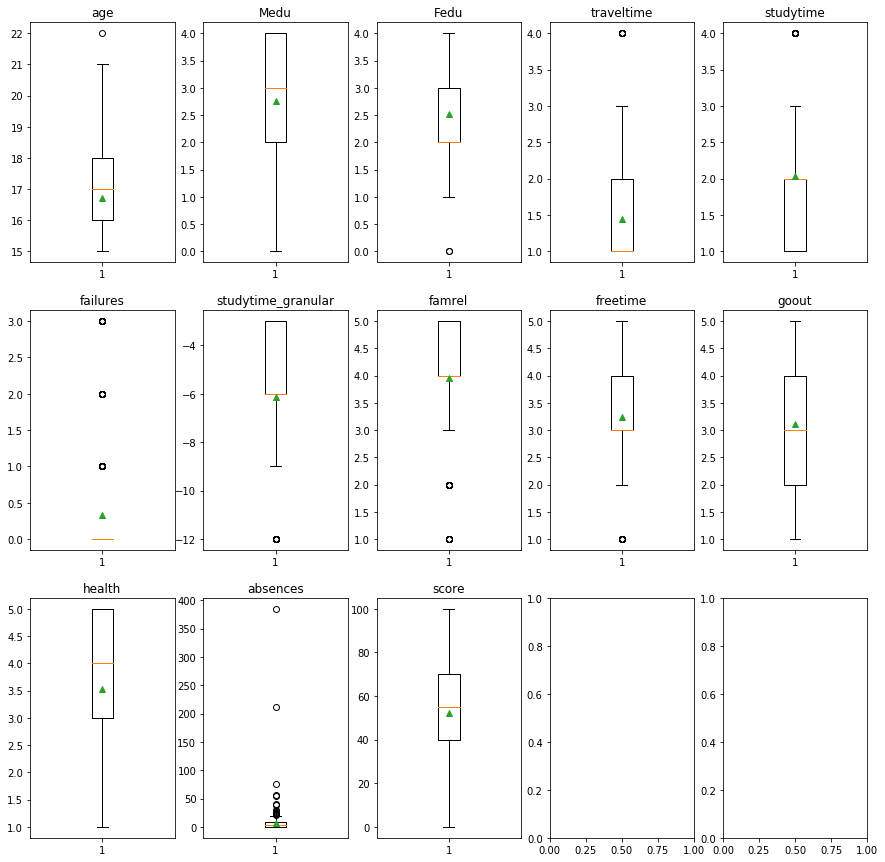

In [209]:
# Calculate graphs number to indicate
graphs_num = 0
for column in data.columns:
    if data[column].dtype != 'O':
        graphs_num += 1

# Create figure with [rows x cols] graphs
cols = 5
rows = graphs_num//cols + 1
fig, axs = plt.subplots(rows, cols, figsize=(cols*3, rows*5))

# Plot graphs
i = 0
for column in data.columns:
    if data[column].dtype != 'O':
        axs[i//cols, i%cols].boxplot(data.loc[data[column].notna(), column], showmeans=True)
        axs[i//cols, i%cols].set_title(column)
        i += 1

Неверных значений не наблюдается ни на одном графике. Но видно, что колонка 'failures' имеет только одно значение внутри усов боксплота - 0. Данную колонку можно сразу удалить из датафрейма.

In [210]:
data.drop(columns='failures', inplace= True)

Проведем автоматическую замену выбросов на NaN (для столбцов с числовыми значениями)

In [211]:
for column in data.columns:
    if data[column].dtype != 'O':
        # Calculate NaNs, Q1, Q3, IQR
        NaN_count = data[column].isna().sum()
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Replace values
        mask = data[column].between(Q1 - 1.5*IQR, Q3 + 1.5*IQR)
        data[column].where(mask, inplace=True)

        # Show the result
        replaced_num = data[column].shape[0] - mask.sum() - NaN_count
        if replaced_num:
            print(f"{str(replaced_num).ljust(3)} value(s) have been replaced in column '{column}'")

1   value(s) have been replaced in column 'age'
2   value(s) have been replaced in column 'Fedu'
7   value(s) have been replaced in column 'traveltime'
27  value(s) have been replaced in column 'studytime'
27  value(s) have been replaced in column 'studytime_granular'
24  value(s) have been replaced in column 'famrel'
18  value(s) have been replaced in column 'freetime'
17  value(s) have been replaced in column 'absences'


### Просмотр уникальных значений
Посмотрим для номинативных переменных

In [212]:
for column in data.columns:
    if data[column].dtype == 'O':
        print(column.join(['', ':']).ljust(12), end='')
        print(data[column].unique())

school:     ['GP' 'MS']
sex:        ['F' 'M']
address:    ['U' nan 'R']
famsize:    [nan 'GT3' 'LE3']
Pstatus:    ['A' nan 'T']
Mjob:       ['at_home' 'health' 'other' 'services' 'teacher' nan]
Fjob:       ['teacher' 'other' nan 'health' 'services' 'at_home']
reason:     ['course' 'other' 'home' 'reputation' nan]
guardian:   ['mother' 'father' 'other' nan]
schoolsup:  ['yes' 'no' nan]
famsup:     ['no' 'yes' nan]
paid:       ['no' nan 'yes']
activities: ['no' 'yes' nan]
nursery:    ['yes' 'no' nan]
higher:     ['yes' nan 'no']
internet:   [nan 'yes' 'no']
romantic:   ['no' nan 'yes']


Посмотрим для числовых переменных (это можно сделать, так как уникальных значений для них не много)

In [213]:
for column in data.columns:
    if data[column].dtype != 'O':
        print(column.join(['', ':']).ljust(12), end='')
        print(np.sort(data[column].unique()))

age:        [15. 16. 17. 18. 19. 20. 21. nan]
Medu:       [ 0.  1.  2.  3.  4. nan]
Fedu:       [ 1.  2.  3.  4. nan]
traveltime: [ 1.  2.  3. nan]
studytime:  [ 1.  2.  3. nan]
studytime_granular:[-9. -6. -3. nan]
famrel:     [ 3.  4.  5. nan]
freetime:   [ 2.  3.  4.  5. nan]
goout:      [ 1.  2.  3.  4.  5. nan]
health:     [ 1.  2.  3.  4.  5. nan]
absences:   [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. nan]
score:      [  0.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.  70.  75.  80.
  85.  90.  95. 100.  nan]


Подозрительных значений не обнаружено. Всё в порядке, дополнительной очистки данных не требуется.

### Корреляционный анализ
Выясним, какие столбцы коррелируют с оценкой на госэкзамене. Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить.

Рассчитаем матрицу корреляций

In [214]:
corr_table = data.corr()
corr_table

,age,Medu,Fedu,traveltime,studytime,studytime_granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.167883,-0.162747,0.115437,0.070557,-0.070557,0.041816,0.030180,0.119997,-0.047402,0.129016,-0.153518
Medu,-0.167883,1.000000,0.639999,-0.135171,0.091193,-0.091193,0.060018,0.012817,0.064164,-0.045051,0.065712,0.213349
Fedu,-0.162747,0.639999,1.000000,-0.094873,0.089786,-0.089786,-0.009928,-0.040852,0.040199,0.008538,-0.020560,0.139615
traveltime,0.115437,-0.135171,-0.094873,1.000000,-0.128818,0.128818,-0.044674,-0.062865,-0.033557,-0.035184,-0.065529,-0.072792
studytime,0.070557,0.091193,0.089786,-0.128818,1.000000,-1.000000,0.079992,-0.089910,-0.047142,-0.042698,-0.083024,0.112830
studytime_granular,-0.070557,-0.091193,-0.089786,0.128818,-1.000000,1.000000,-0.079992,0.089910,0.047142,0.042698,0.083024,-0.112830
famrel,0.041816,0.060018,-0.009928,-0.044674,0.079992,-0.079992,1.000000,0.107271,0.096541,0.028073,-0.020196,0.057692
freetime,0.030180,0.012817,-0.040852,-0.062865,-0.089910,0.089910,0.107271,1.000000,0.258559,0.056916,0.092394,0.000582
goout,0.119997,0.064164,0.040199,-0.033557,-0.047142,0.047142,0.096541,0.258559,1.000000,-0.015608,0.111587,-0.129685
health,-0.047402,-0.045051,0.008538,-0.035184,-0.042698,0.042698,0.028073,0.056916,-0.015608,1.000000,-0.014358,-0.070460


Отсортируем корреляции со 'score' по абсолютному значению

In [215]:
corr_table['score'].abs().sort_values(ascending=False)

score                 1.000000
Medu                  0.213349
age                   0.153518
Fedu                  0.139615
goout                 0.129685
studytime_granular    0.112830
studytime             0.112830
absences              0.081274
traveltime            0.072792
health                0.070460
famrel                0.057692
freetime              0.000582
Name: score, dtype: float64

Наибольшая корреляция баллов на госэкзаме наблюдается с образованием матери ученика ('Medu'). Корреляция отсутствует со свободным временем ученика ('freetime'). Удалим данный столбец.

In [216]:
data.drop(columns='freetime', inplace=True)

### Анализ номинативных переменных
Очевидно, что для номинативных переменных использовать корреляционный анализ не получится. Однако можно посмотреть, различаются ли распределения рейтинга в зависимости от значения этих переменных.

С помощью теста Стьюдента проверим есть ли статистически значимая разница в распределении баллов по госэкзамену для раных значений номинативных переменных. Проверим нулевую гипотезу о том, что распределения баллов по различным параметрам неразличимы:

In [217]:
not_signif_columns = []
for column in data.columns:
    if data[column].dtype == 'O':
        top10_values = data[column].value_counts().index[:10]
        combs = list(combinations(top10_values, 2))
        for comb in combs:
            if ttest_ind(data.loc[(data[column] == comb[0]) & (data['score'].notna()), 'score'], 
                         data.loc[(data[column] == comb[1]) & (data['score'].notna()), 'score']). \
                            pvalue <= 0.05/len(combs): # Bonferroni correction
                print(f"Statistically significant differences have been found for column '{column}'")
                break
        else:
            not_signif_columns.append(column)

Statistically significant differences have been found for column 'address'
Statistically significant differences have been found for column 'Mjob'
Statistically significant differences have been found for column 'higher'
Statistically significant differences have been found for column 'romantic'


Как мы видим, статистически значимые различия наблюдаются для следующих переменных: 'address', 'Mjob', 'higher' и 'romantic'. Оставим эти переменные в датасете для дальнейшего построения модели. Остальные номинативные переменные удалим. 

In [218]:
data.drop(columns=not_signif_columns, inplace=True)

Построим боксплоты для номинативных переменных (которые мы оставили) для визуализации различия распределения баллов госэкзамена в зависимости от значения этих переменных.

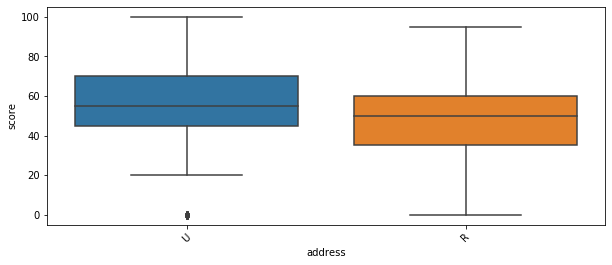

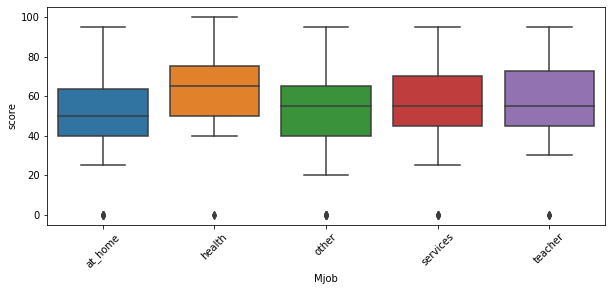

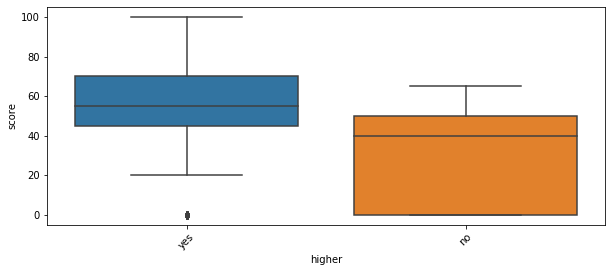

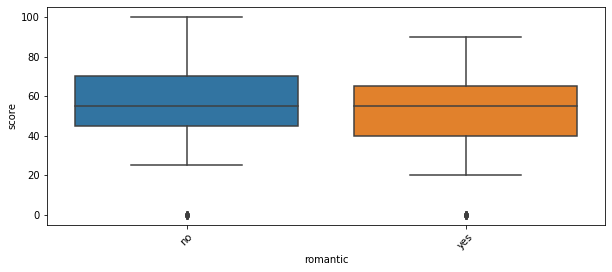

In [219]:
for column in data.columns:
    if data[column].dtype == 'O':
        fig, ax = plt.subplots(figsize=(10, 4))
        sns.boxplot(x=column,
                    y='score', 
                    data=data[data[column].isin(data[column].value_counts().index[:10])],
                    ax=ax)
        plt.xticks(rotation=45)
        plt.show()

Выведем важные переменные, которые, возможно, оказывают влияние на количество баллов на госэкзамене по математике

In [220]:
signif_columns = list(data.columns)
signif_columns.remove('score')
print(signif_columns)

['age', 'address', 'Medu', 'Fedu', 'Mjob', 'traveltime', 'studytime', 'studytime_granular', 'higher', 'romantic', 'famrel', 'goout', 'health', 'absences']


### Результаты EDA
Итак, в результате EDA для анализа влияния параметров ученика на количество набранных им баллов на госэкзамене по математике можно сделать следующие выводы:

1. Данные можно считать достаточно чистыми, так как:
    - количество пустых значений: максимальная доля пустых значений - 10,1 % (у столбца 'paid');
    - количество неверных значений: всего 2 неверных значения (одно у столбца 'Fedu' и одно у 'famrel').
    - количество выбросов: максимум 27 выбросов обнаружено для колонок 'studytime' и 'studytime_granular'.
2. Положительная корреляция имеется со столбцами (по убыванию): 'Medu', 'Fedu', 'studytime', 'absences', 'famrel'. Здесь неожиданной оказалась положительная корреляция с количеством пропущенных занятий 'absences'.
3. Отрицательная корреляция имеется со столбцами (по убыванию абсолютного значения): 'age', 'goout', 'studytime_granular', 'traveltime', 'health'. Здесь неочевидными оказались отрицательные корреляции с созрастом 'age' и здоровьем 'health'.
4. Воздействующие номинативные переменные: 'address', 'Mjob', 'higher', 'romantic'.